In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

mu = 0.001
epochs = 10

np.random.seed(0)

# Read in data
lines_data = []
with open('new.txt', 'rt') as in_file:
    for line in in_file:
        lines_data.append(line.rstrip('\n'))

data_list = []
for line in lines_data:
    label = int(re.split(':', line)[0])

    parsed_input = re.split('1:', line)[1].strip()
    parsed_input = parsed_input.replace("[", "")
    parsed_input = parsed_input.replace("]", "")
    parsed_input_list = parsed_input.split(',')
    inputs = [float(el) for el in parsed_input_list]
    row = [label] + inputs
    data_list.append(row)
data = np.asarray(data_list)

L = data[:,0] # labels of samples

# Generate random weights of 256 + 256 + 256 AND 1 for initial bias
W = np.random.random_sample((256 * 3) + 1,) - np.random.random_sample()

# rows = data.shape[0]
rows = 200
cols = data.shape[1]

print('first row')

print(W)
print(W[0])
print(np.sum(np.multiply(data[0, 400:], W[400:])))
# charge = W[0] + np.sum(np.multiply(data[i, 1:], W[1:]))


first row
[ -2.43066066e-01  -7.66902033e-02  -1.89116194e-01  -2.46996387e-01
  -3.68224770e-01  -1.45985457e-01  -3.54292358e-01   9.98934312e-02
   1.71783191e-01  -4.08438051e-01  -1.54531548e-04  -2.62984650e-01
  -2.23835009e-01   1.33717069e-01  -7.20843511e-01  -7.04750270e-01
  -7.71661172e-01   4.07402759e-02  -1.37228187e-02   7.81325786e-02
   1.86738773e-01   7.27899459e-03  -3.30400207e-01  -1.13503933e-02
  -6.73605144e-01  -1.51958548e-01  -6.48526282e-01   1.52789347e-01
  -2.70031248e-01  -3.77217630e-01  -5.27323958e-01  -1.76458802e-02
  -3.35729237e-01  -2.23445621e-01  -7.73089769e-01  -1.74244073e-01
  -1.79783847e-01  -1.74945573e-01   1.51868509e-01  -1.10059271e-01
  -4.32371669e-01  -3.54847616e-01  -9.42483737e-02  -7.31654098e-01
  -1.25112854e-01  -1.21241700e-01  -5.81497009e-01  -6.62953272e-01
  -4.76451219e-01  -4.28168799e-01  -2.21682799e-01  -3.53278056e-01
   1.96494268e-01  -6.89834759e-01  -5.83002814e-01  -6.30570052e-01
  -1.38771244e-01  -5.38

Charge: -26.642143
Predict: 0
Error: -1.000000 charge: -26.642143 predict: 0.000000 L[i]: 1.000000
Charge: -24.844072
Predict: 0
Error: -1.000000 charge: -24.844072 predict: 0.000000 L[i]: 1.000000
Charge: -81.015557
Predict: 0
Error: -1.000000 charge: -81.015557 predict: 0.000000 L[i]: 1.000000
Charge: -24.122409
Predict: 0
Error: -1.000000 charge: -24.122409 predict: 0.000000 L[i]: 1.000000
Charge: -27.063351
Predict: 0
Error: -1.000000 charge: -27.063351 predict: 0.000000 L[i]: 1.000000
Charge: -23.149098
Predict: 0
Error: -1.000000 charge: -23.149098 predict: 0.000000 L[i]: 1.000000
Charge: -14.479205
Predict: 0
Error: -1.000000 charge: -14.479205 predict: 0.000000 L[i]: 1.000000
Charge: -24.002285
Predict: 0
Error: -1.000000 charge: -24.002285 predict: 0.000000 L[i]: 1.000000
Charge: -67.562727
Predict: 0
Error: -1.000000 charge: -67.562727 predict: 0.000000 L[i]: 1.000000
Charge: -57.923217
Predict: 0
Error: -1.000000 charge: -57.923217 predict: 0.000000 L[i]: 1.000000
Charge: -8

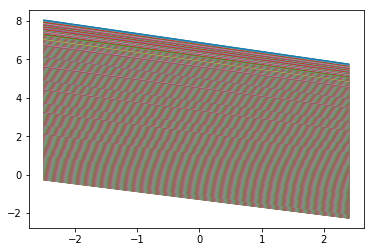

In [36]:
for j in range(epochs):
    accuracy = 0
    for i in range(rows):
        charge = W[0] + np.dot(data[i, 1:], W[1:])
        print("Charge: %f" % charge)
        predict = 1 if charge > 0 else 0
        print("Predict: %d" % predict)
        if predict == L[i]:
            accuracy += 1
        else:
            Error = predict - L[i]
            W_t = W
            # X_t = np.concatenate([:, 1], data[i, 1:])
            X_t  = np.concatenate(([1], data[i,1:]))
            # W_t = np.multiply(mu, np.multiply(Error, data[i, 1:]))
            W_t = np.multiply(mu, np.multiply(Error, X_t))
            W = np.subtract(W, W_t)
            print("Error: %f charge: %f predict: %f L[i]: %f" % (Error, charge, predict, L[i]))
            plt.plot (np.arange (-2.5,2.5,0.1), -W[0]/W[2] - W[1]/W[2] * np.arange(-2.5,2.5,0.1))
    print("Accuracy: %f" % (float(accuracy) / rows))
plt.show()